# <font color='black'>EE25737: Introduction to Machine Learning</font>
## <font color='black'>Fall 1400-01, Group 2</font>
## HW4: Clustering & Decision Trees

### Name: Amirmehdi Jafari Fesharaki
### Student No: 98109645

In this problem you will implement clustering algorithms (K-means), decision trees and random forest.<br>
Answer the questions in your report, which should not exceed three pages.

# Libararies

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.io import loadmat
%matplotlib inline

## A. Decision Trees

The dataset <code>mushrooms.csv</code> includes the overall features of some population of mushrooms. Each data point has <code>22</code> features (e.g. habitat, size, color, etc.) and the goal is to classify mushrooms as poisonous ($y=0$) or edible ($y=1$), by using Decision Trees classifiers. Use built-in models of libraries in [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for training and predicting labels of the data. Do not change the default parameters of the model excpet $max\_depth$.

### A1. Load Data
The first cloumn is the label, and the remaining <code>22</code> columns are features of data points. Split the data into three sets: the first <code>70%</code> for training, the next <code>20%</code> for verification, and the remaining <code>10%</code> for testing. The validation set is for choosing the best model among all models based on the error ($\frac{1}{n}\sum_{i=1}^{n} \boldsymbol{1}_{prediction_{i}\neq y_i}$). The test set is for estimating the true error of the selected model.<br>
Import data with pandas library.

In [130]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [132]:
data_array = df.to_numpy()
np.random.shuffle(data_array)

X = data_array[:,1:23]
Y = data_array[:,0]

## Splitting the data

lim1 = int(70/100 * len(X))
lim2 = int(90/100 * len(X))

X_train = X[0:lim1,:]
Y_train = Y[0:lim1]

X_verif = X[lim1:lim2,:]
Y_verif = Y[lim1:lim2]

X_test = X[lim2:,:]
Y_test = Y[lim2:]

### A2. Train Desicion Tree
Set the <code>maximum depth</code> of the tree to $\{4, 6, 8, 10, 12, 14, 16, 18, 20\}$. For each maximum depth, train a classifier on the training data and report the resulting loss on the validation set. Plot the loss against the maximum depth. What is the best maximum depth?<br>
Finally, using the best maximum depth, train the classfier on the train and validation sets together and report the loss on the test set.

In [138]:
## Train Desicion Tree for each depth here
max_depth_list = [4,6,8,10,12,14,16,18,20]
loss_list = []
for max_depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X_train, Y_train)
    loss_list.append(1-clf.score(X_verif, Y_verif))
best_max_depth = max_depth_list[loss_list.index(min(loss_list))]

print('The best result happens with the maximum depth of:', best_max_depth)

The best result happens with the maximum depth of: 8


Plot test errors over the depth of trees, and explain your observations.

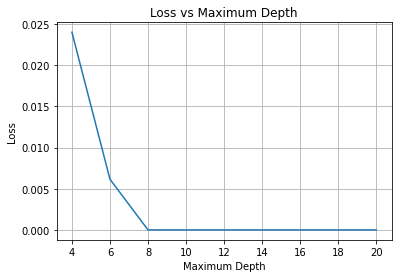

In [148]:
## plotting
plt.figure()
plt.plot(max_depth_list, loss_list)
plt.grid()
plt.title('Loss vs Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Loss')
plt.show()

As the plot above shows, the loss is 0 for maximum depths more than 8. As a result, in order to avoid overfitting we should take the maximum depth as lowest as possible which in this case is equal to 8.

In [147]:
X_train_all = np.append(X_train, X_verif, axis=0)
Y_train_all = np.append(Y_train, Y_verif)
clf = DecisionTreeClassifier(max_depth = best_max_depth)
clf.fit(X_train_all, Y_train_all)
final_loss = 1 - clf.score(X_test, Y_test)

print('The loss of the classification on the test set for the best maximum depth is:', final_loss)

The loss of the classification on the test set for the best maximum depth is: 0.0


### A3. Train Random Forest
In this section, the goal is to classify mushrooms as poisonous ($y=0$) or edible ($y=1$), by using Random Forest classifiers. Use built-in models of libraries in [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for training and predicting labels of the data.
Set the <code>maximum depth</code> of the trees to $\{1, 2, 4, 6\}$ and the number of trees to $\{30,60,100,200,300\}$. For each maximum depth and number of trees, train a classifier on the training data and report the resulting loss on the validation set. Plot the loss against the maximum depth. What is the best maximum depth and number of tress?<br>
Finally, using the best maximum depth and number of trees, train the classfier on the train and validation sets together and report the loss on the test set.

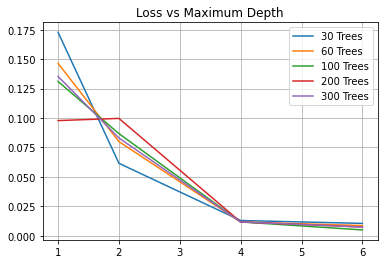

In [158]:
# Your code Here
tree_number_list = [30, 60, 100, 200, 300]
max_depth_list = [1,2,4,6]
best_max_depth_list = [] # keeps the best max depth for each tree number
tree_loss_list = []
for tree_number in tree_number_list:
    loss_list = []
    for max_depth in max_depth_list:
        clf = RandomForestClassifier(n_estimators=tree_number, max_depth = max_depth)
        clf.fit(X_train, Y_train)
        loss_list.append(1-clf.score(X_verif, Y_verif))
    best_max_depth = max_depth_list[loss_list.index(min(loss_list))]
    best_max_depth_list.append(best_max_depth)
    tree_loss_list.append(min(loss_list))
    
    ## plotting
    label = str(tree_number) + ' Trees'
    plt.plot(max_depth_list, loss_list, label=label)
plt.grid(True)
plt.title('Loss vs Maximum Depth')
plt.legend()

In [164]:
## best values for the hyperparameters
ind = tree_loss_list.index(min(tree_loss_list))
best_max_depth, best_tree_number = best_max_depth_list[ind], tree_number_list[ind]
print('The minimum loss happens with a maximum depth of %s and %s trees'%(best_max_depth, best_tree_number))

The minimum loss happens with a maximum depth of 6 and 100 trees


In [166]:
clf = RandomForestClassifier(n_estimators = best_tree_number, max_depth = best_max_depth)
clf.fit(X_train_all, Y_train_all)
test_loss = 1 - clf.score(X_test, Y_test)

print('Test loss:', test_loss)
print('Test Accuracy:', 1 - test_loss)

Test loss: 0.004920049200492049
Test Accuracy: 0.995079950799508


# B. General K-means

In this section, you are supposed to write a Python function that applies the k-means algorithm on the given input data and outputs the clusters. Your code should be a generic function such that it can handle any shape of input data (any number of features), any number of clusters, and any set of initial points(center of the clusters). Then, apply your function on the SampleData2.mat dataset with 5 clusters and plot the clustering in a 2D scatter figure. Change the initial points and interpret the results.


## k_means_clustering Function

In [413]:
def k_means_clustering(X, init_centers, return_steps = False):
    ''' This function gets a dataset and the initial clustering centers (the number of clusters is calculated from the
    number of centers), and returns a 1D array containig the number of the cluster for each data and an array 
    containig the coordinates of the centers'''
    centers = np.array(init_centers)
    c_num = centers.shape[0] # number of clusters
    no_changes = False 
    clusters = np.zeros(len(X))
    step = 0
    while (no_changes == False):
        previous_clusters = clusters.copy()
        previous_centers = centers.copy()
        
        distances_array = np.zeros([len(X), 1])
        for center in centers:
            distances = np.array([])
            for x in X:
                distance = np.linalg.norm(x - center)
                distances = np.append(distances, distance)
            distances_array = np.append(distances_array, distances.reshape(len(distances), 1), axis=1)
        distances_array = np.delete(distances_array, 0, axis = 1)
        clusters = np.argmin(distances_array, axis = 1)
        
        # finding the new centers 
        centers = np.zeros([1, centers.shape[1]])
        for cluster in range(c_num):
            center = np.mean(X[clusters==cluster], axis=0)
            center = center.reshape([1, center.shape[0]])
            centers = np.append(centers, center, axis=0)
        centers = np.delete(centers, 0, axis=0)
        # checking if there were any changes in the clusters
        no_changes = np.array_equal(clusters, previous_clusters) and np.array_equal(centers, previous_centers)
        step = step + 1
    output = (clusters, centers)
    if(return_steps):
        output = (output, steps)
    return output

## Loading the data

In [414]:
data = loadmat('SampleData2.mat')['DataNew'].T
df = pd.DataFrame(data, columns=['X1', 'X2'])

X_arr = df.to_numpy()

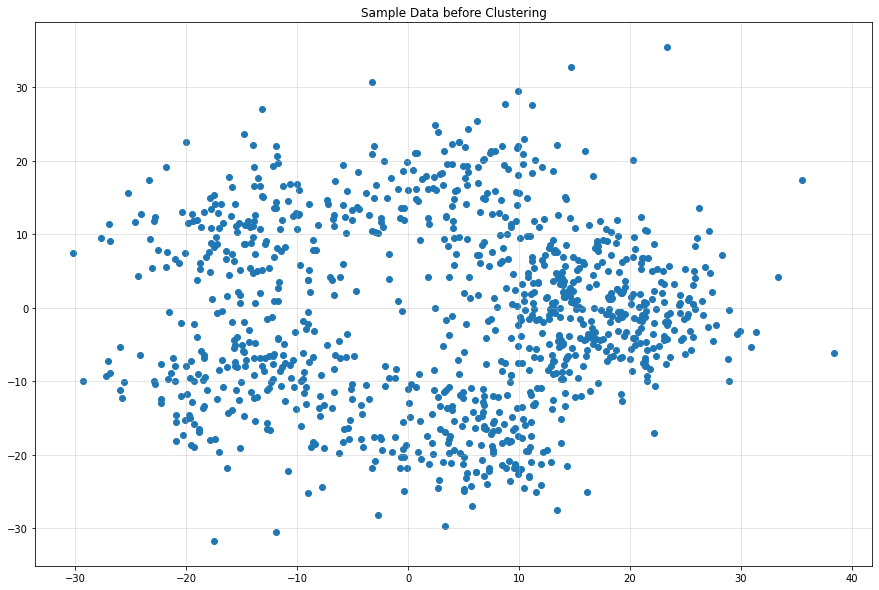

In [415]:
plt.figure(figsize=(15,10))
plt.scatter(X_arr[:,0], X_arr[:,1])
plt.title('Sample Data before Clustering')
plt.grid(alpha=0.4)
plt.show()

## Generating Random Initial Points

In [453]:
x_min = np.min(X_arr[:,0])
x_max = np.max(X_arr[:,0])

y_min = np.min(X_arr[:,1])
y_max = np.max(X_arr[:,1])

def random_inits_cluster(limits, X_arr):
    x_min, x_max, y_min, y_max = limits
    init_x = np.random.rand(5) * (x_max - x_min) + x_min
    init_y = np.random.rand(5) * (y_max - y_min) + y_min
    init_points = np.append(init_x.reshape([5,1]), init_y.reshape([5,1]), axis = 1)
    print('Initial Centers:')
    print(init_points)
    clusters, centers = k_means_clustering(X_arr, init_points)
    plt.figure(figsize=(15,10))
    for cluster in range(5):
        X_cluster = X_arr[clusters==cluster]
        plt.scatter(X_cluster[:,0], X_cluster[:,1], label='Cluster %s'%(cluster))
    plt.title('Clustered Data')
    plt.grid(alpha=0.4)

    
    ## showing initial points
    plt.scatter(init_points[:,0], init_points[:,1], marker='+', linewidth=1.5, c='black', label='Initials')
    plt.legend()

Initial Centers:
[[-25.2265199   22.82541844]
 [ 31.07402305 -16.74082352]
 [ 11.46023254   3.73130639]
 [-23.15621211   8.04847726]
 [  8.84087089  10.95789782]]


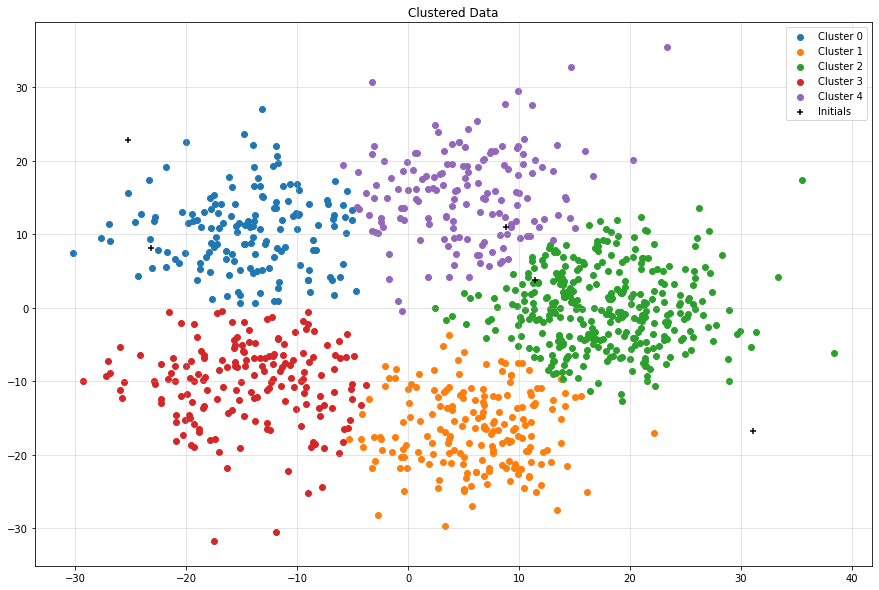

In [454]:
random_inits_cluster((x_min,x_max,y_min,y_max), X_arr)

Initial Centers:
[[-25.79723644  -6.13342717]
 [ 35.00703497 -17.19576154]
 [ 14.2085413    4.5585805 ]
 [  3.9774907  -15.39169117]
 [ 24.88412211  23.01733007]]


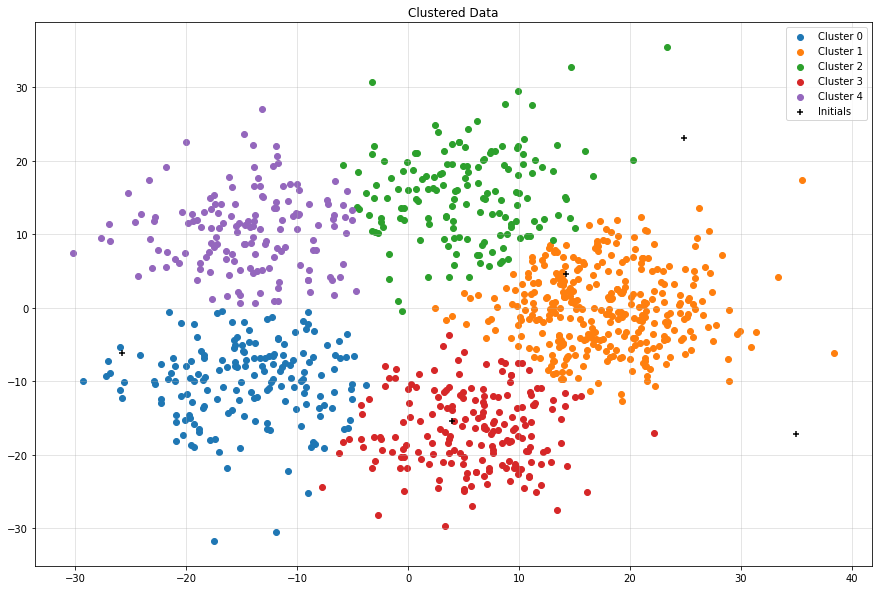

In [455]:
random_inits_cluster((x_min,x_max,y_min,y_max), X_arr)

Initial Centers:
[[ -9.45802965  -1.76094546]
 [-18.64904806  11.35405917]
 [ 30.02480828  -8.33371781]
 [-12.94997337  16.05930818]
 [ 21.05458101   6.61012219]]


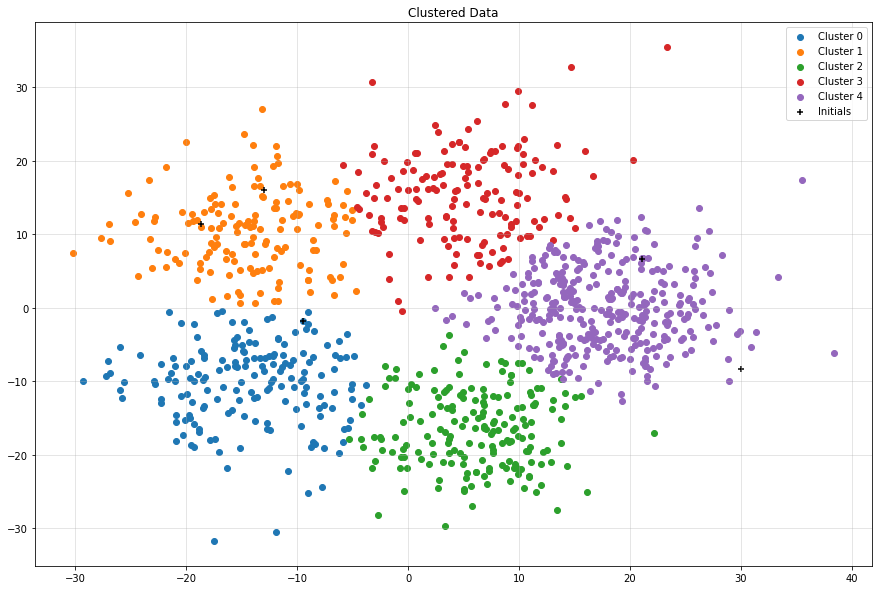

In [456]:
random_inits_cluster((x_min,x_max,y_min,y_max), X_arr)

Initial Centers:
[[ -9.67037767 -11.75616066]
 [ -5.71502235  -5.42864136]
 [-12.17910572  -5.62358835]
 [ -3.21146323 -13.52809751]
 [ 11.54985505   4.07151688]]


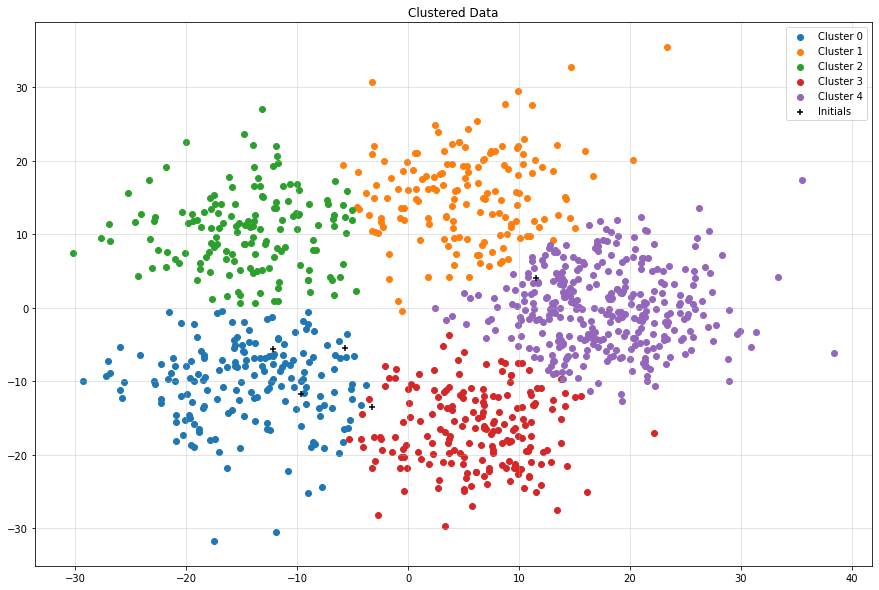

In [457]:
random_inits_cluster((x_min,x_max,y_min,y_max), X_arr)

Initial Centers:
[[  5.43285456  -9.49705925]
 [ 20.62382513  16.58365937]
 [ 27.31685445   0.30115133]
 [  8.3245997   11.74130975]
 [ 21.85152146 -20.95880004]]


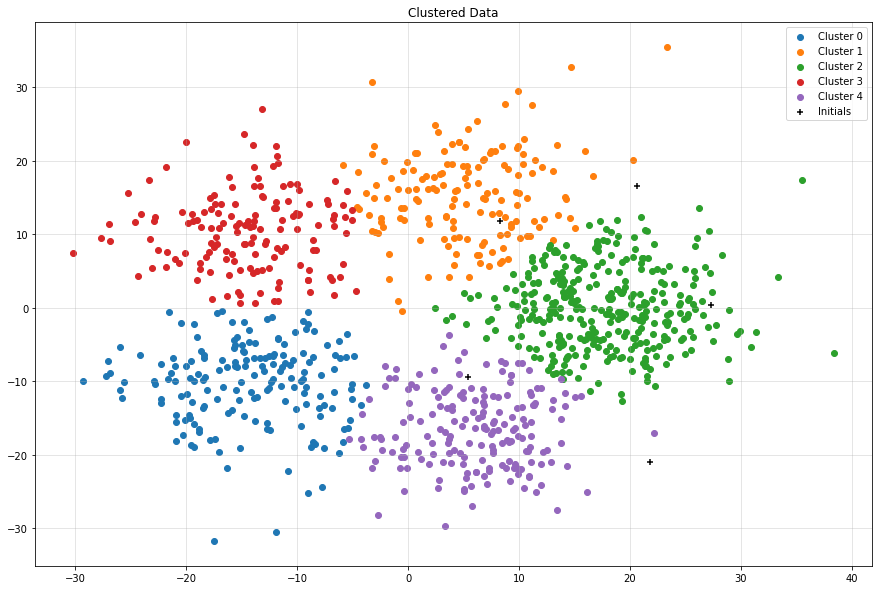

In [459]:
random_inits_cluster((x_min,x_max,y_min,y_max), X_arr)

<b>As we can see, the clustering works perfectly and the results is always the same with all of our random initial points. However, changing the initial points can change the number of iterations needed.</b>